## DataFrame Calculations
Write a Python program that contains two DataFrames, one for amino acids and one for
nucleotides. Each DataFrame should have at least 1000 rows and the corresponding amino
acids or nucleotides as columns. Fill the DataFrames with random numbers. For each column
in your DataFrames fullfill the following tasks:
1. Create a Histogram
2. Calculate the Following:
   1. Sum
   2. Mean
   3. Standard deviation
   4. Median
   5. Mode
   6. Variance
   7. Maximum value
   8. Minimum value
3. Find the row with the highest and the lowest number

Afterwards create diagrams of your choice to visualize the calculated values.


#### Additional Exercise 1:     
Adjust your program so that the user can chose to either first enter new data to your
DataFrames or directly start the calculations. Additionally allow the user to choose between
working on either just the protein data, just the nucleotide data or on both of them.


#### Additional Exercise 2:
Create a GUI for your program that allows the user to make his choices and enables him to
enter new data into your DataFrames.
#### Additional Exercise 3:
Let the user choose which calculations he wants to do with the data in the DataFrame, that
means the user can choose between sum, mean, median etc.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# centimeters in inches for matplotlib
cm = 1/2.54

In [2]:
#create the data frames: Prepare the row and col names
rownames1 = ["Row"+str(i) for i in range(1,1501)]
colnamesN = ["A","C","G","T","U"]
colnamesA = ["alanine","arginine","asparagine","aspartic acid","cysteine","glutamine","glutamic acid","glycine","histidine","isoleucine"]
colnamesA2 = ["leucine","lysine","methionine","phenylalanine","proline","serine","threonine","tryptophan","tyrosine","valine"]
colnamesA.extend(colnamesA2)


df_aa = pd.DataFrame(np.random.randn(1500,20), index = rownames1, columns = colnamesA)
df_nt = pd.DataFrame(np.random.randn(1500,5), index = rownames1, columns = colnamesN)

#round the random numbers
for i in range(0,1500):
    for j in range(0,20):
        df_aa.iloc[i,j] = round(df_aa.iloc[i,j],2)

for i in range(0,1500):
    for j in range(0,5):
        df_nt.iloc[i,j] = round(df_nt.iloc[i,j],2)
#print(df3)

In [3]:
print(df_aa.iloc[0:10,0:10])
print("***********************************")
print(df_nt.iloc[0:10,0:10])

       alanine  arginine  asparagine  aspartic acid  cysteine  glutamine  \
Row1      0.70     -1.97        0.85          -0.12     -0.68      -0.30   
Row2     -1.43      0.03       -0.68          -0.59     -1.09       0.73   
Row3     -0.03      0.20        0.28          -0.17      1.19      -1.69   
Row4      1.40     -0.21        0.40          -1.83      0.11       0.58   
Row5     -0.73     -0.39        0.20           0.40      0.52       0.17   
Row6      0.54      0.32       -0.80           0.42     -0.46       0.12   
Row7      1.31      0.49        0.74          -0.81     -1.16       1.72   
Row8      2.26      0.34        0.45           0.31      1.68       0.54   
Row9      0.64     -2.11        0.88           0.79     -0.30      -1.14   
Row10     0.32      0.86        1.86          -0.59     -0.07       0.54   

       glutamic acid  glycine  histidine  isoleucine  
Row1           -1.08     0.83       1.24        0.31  
Row2           -1.06    -1.03      -2.43        0.07 

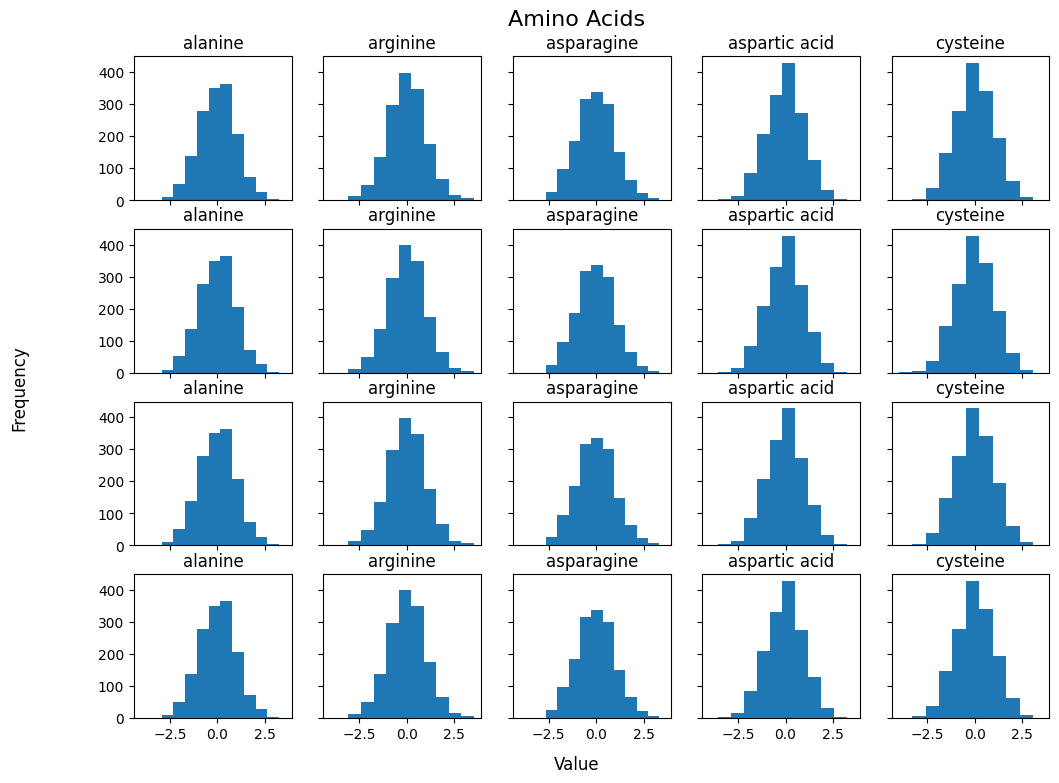

In [4]:
#histogram for the amino acids

fig, axs = plt.subplots(4,5,sharex=True, sharey = True)
fig.set_figwidth(30*cm)
fig.set_figheight(20*cm)
#fig.suptitle('Nucleotides')
for i,j in zip([0,1,2,3,4,0,1,2,3,4,0,1,2,3,4,0,1,2,3,4],[0,0,0,0,0,1,1,1,1,1,2,2,2,2,2,3,3,3,3,3]):
    axs[j,i].hist(df_aa.iloc[:,i])
    axs[j,i].set(title = df_aa.iloc[:,i].name)

# Hide x labels and tick labels for top plots and y ticks for right plots
for ax in axs.flat:
    ax.label_outer()
fig.suptitle("Amino Acids", fontsize=16)
fig.supxlabel('Value')
fig.supylabel('Frequency')
plt.subplots_adjust(top=0.92, bottom =0.08)

plt.show() 
#plt.savefig("Image.png")
plt.close()


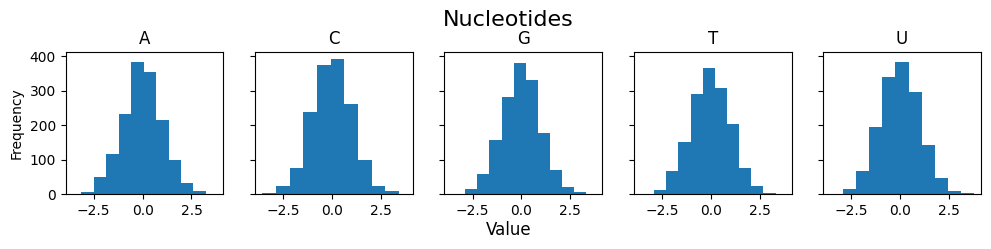

In [5]:
#histogram for the nulceotides

fig, axs = plt.subplots(1,5,sharex=True, sharey = True)
fig.set_figwidth(30*cm)
fig.set_figheight(6*cm)
#fig.suptitle('Nucleotides')
for i in range(0,len(df_nt.columns)):
    axs[i].hist(df_nt.iloc[:,i])
    axs[i].set( ylabel='Frequency', title = df_nt.iloc[:,i].name)

# Hide x labels and tick labels for top plots and y ticks for right plots
for ax in axs.flat:
    ax.label_outer()
fig.suptitle("Nucleotides", fontsize=16)
fig.supxlabel('Value')
plt.subplots_adjust(top=0.8, bottom =0.2)

plt.show() 
#plt.savefig("Image.png")
plt.close()


In [6]:
# This one sorts the dictionary by calculation, i.e. all sum etc are together
def df_calc(df, name, outer_dict):
    if type(outer_dict) != dict:
        raise Exception ("The outer_dict must be a dictionary!")
    elif type(name) != str:
        raise Exception ("The name must be a string!")
    elif type(df) != pd.core.frame.DataFrame or not df_aa.select_dtypes(exclude=["float", 'int']).empty:
        raise Exception ("The DataFrame must be a Pandas DataFrame containg only floats or integers!")
    else:
        outer_dict[name] = {}
        
        outer_dict[name]["sum"] = {}
        outer_dict[name]["mean"] = {}
        outer_dict[name]["std"] = {}
        outer_dict[name]["median"] = {}
        outer_dict[name]["mode"] = {}
        outer_dict[name]["var"] = {}
        outer_dict[name]["max"] = {}
        outer_dict[name]["min"] = {}
        outer_dict[name]["idxmin"] = {}
        outer_dict[name]["idxmax"] = {}
        
        for names in df.columns:
            outer_dict[name]["sum"][names] = df.sum()[names]
            outer_dict[name]["mean"][names] = df.mean()[names]
            outer_dict[name]["std"][names] = df.std()[names]
            outer_dict[name]["median"][names] = df.median()[names]
            outer_dict[name]["mode"][names] = df.mode()[names]
            outer_dict[name]["var"][names] = df.var()[names]
            outer_dict[name]["max"][names] = df.max()[names]
            outer_dict[name]["min"][names] = df.min()[names]
            outer_dict[name]["idxmin"][names] = df.idxmin()[names]
            outer_dict[name]["idxmax"][names] = df.idxmax()[names]

In [7]:
results = {}
df_calc(df_aa, "amino_acids", results)
df_calc(df_nt, "nucleotides", results)
#print(results)

In [8]:
#This one sorts the dictionary by amino acid or nucleotide, i.e. all results for alanine are grouped together
def df_calc2(df, name, outer_dict):
    if type(outer_dict) != dict:
        raise Exception ("The outer_dict must be a dictionary!")
    elif type(name) != str:
        raise Exception ("The name must be a string!")
    elif type(df) != pd.core.frame.DataFrame or not df_aa.select_dtypes(exclude=["float", 'int']).empty:
        raise Exception ("The DataFrame must be a Pandas DataFrame contaning only floats or integers!")
    else:
        outer_dict[name] = {}
        for names in df.columns:
            outer_dict[name][names] = {}
            outer_dict[name][names]["sum"] = df.sum()[names]
            outer_dict[name][names]["mean"] = df.mean()[names]
            outer_dict[name][names]["std"] = df.std()[names]
            outer_dict[name][names]["median"] = df.median()[names]
            outer_dict[name][names]["mode"] = df.mode()[names]
            outer_dict[name][names]["var"] = df.var()[names]
            outer_dict[name][names]["max"] = df.max()[names]
            outer_dict[name][names]["min"] = df.min()[names]
            outer_dict[name][names]["idxmin"] = df.idxmin()[names]
            outer_dict[name][names]["idxmax"] = df.idxmax()[names]

In [9]:
results2 = {}
df_calc2(df_aa, "amino_acids", results2)
df_calc2(df_nt, "nucleotides", results2)
#print(results2)

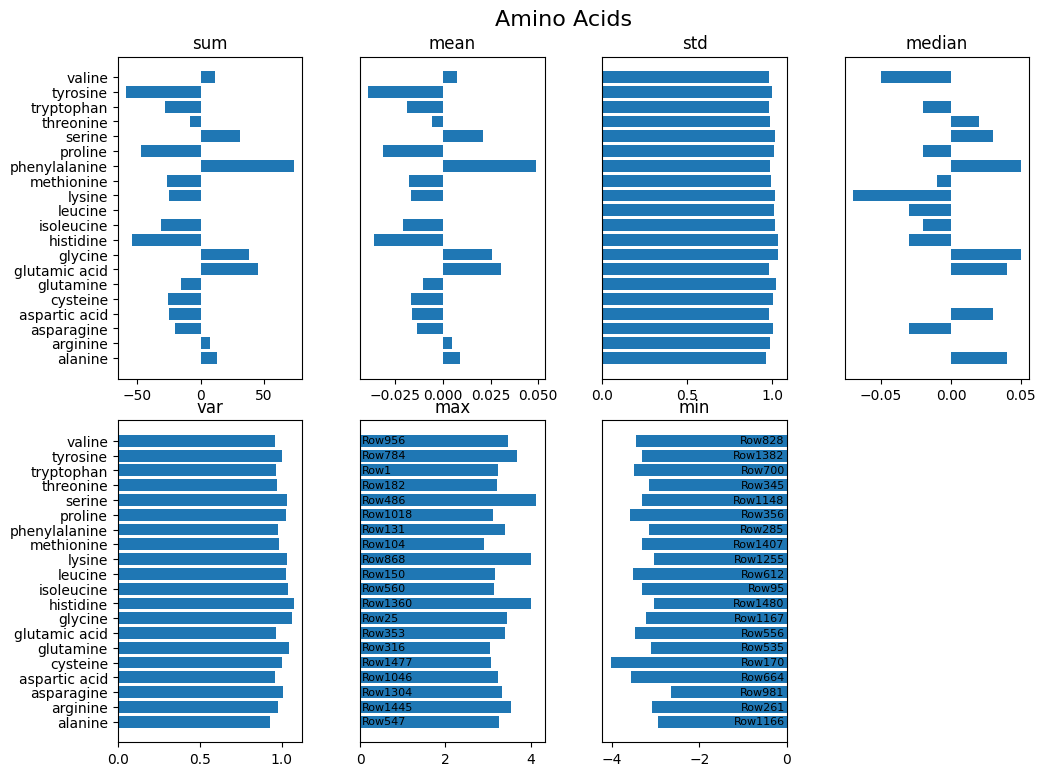

In [10]:
#For the Amino Acids
fig, axs = plt.subplots(2,4)
fig.set_figwidth(25*cm)
fig.set_figheight(20*cm)
fig.tight_layout()
fig.suptitle("Amino Acids", fontsize=16)
for calc,i,j in zip(results["amino_acids"],[0,0,0,0,0,1,1,1,1,1],[0,1,2,3,4,0,1,2,3,4]):
    if i == 1 and j == 3:
        axs[i,j].axis('off')
    if calc == "mode" or calc == "idxmin" or calc == "idxmax":
        continue
    axs[i,j].barh(list(results["amino_acids"][calc].keys()),results["amino_acids"][calc].values())
    axs[i,j].set( title=calc)
    if calc == "max":
        for names in results["amino_acids"]["max"]:
            axs[i,j].text(0.05,names,results["amino_acids"]["idxmax"][names],fontsize = 8, verticalalignment = "center", horizontalalignment = "left")
    if calc == "min":
        for names in results["amino_acids"]["min"]:
            axs[i,j].text(-0.05,names,results["amino_acids"]["idxmin"][names],fontsize = 8, verticalalignment = "center", horizontalalignment = "right")
    if j != 0:
        axs[i,j].set(yticks = [])

plt.subplots_adjust(top=0.92)
plt.show() 
#plt.savefig("Image.png")
plt.close()

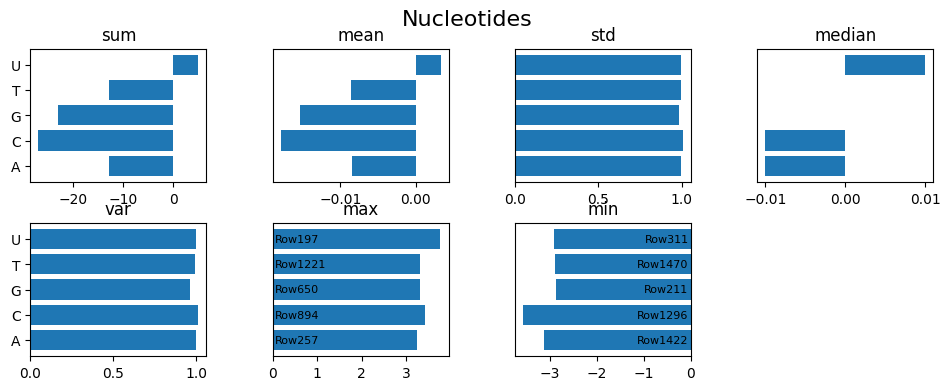

In [11]:
#For the Nucleotides
fig, axs = plt.subplots(2,4)
fig.set_figwidth(25*cm)
fig.set_figheight(10*cm)
fig.tight_layout()
fig.suptitle("Nucleotides", fontsize=16)
for calc,i,j in zip(results["nucleotides"],[0,0,0,0,0,1,1,1,1,1],[0,1,2,3,4,0,1,2,3,4]):
    if i == 1 and j == 3:
        axs[i,j].axis('off')
    if calc == "mode" or calc == "idxmin" or calc == "idxmax":
        continue
    axs[i,j].barh(list(results["nucleotides"][calc].keys()),results["nucleotides"][calc].values())
    axs[i,j].set( title=calc)
    if calc == "max":
        for names in results["nucleotides"]["max"]:
            axs[i,j].text(0.05,names,results["nucleotides"]["idxmax"][names],fontsize = 8, verticalalignment = "center", horizontalalignment = "left")
    if calc == "min":
        for names in results["nucleotides"]["min"]:
            axs[i,j].text(-0.05,names,results["nucleotides"]["idxmin"][names],fontsize = 8, verticalalignment = "center", horizontalalignment = "right")
    if j != 0:
        axs[i,j].set(yticks = [])

plt.subplots_adjust(top=0.88)
plt.show() 
#plt.savefig("Image.png")
plt.close()